In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
#model / data parameters
num_classes = 10
input_shape = (28,28,1)
(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


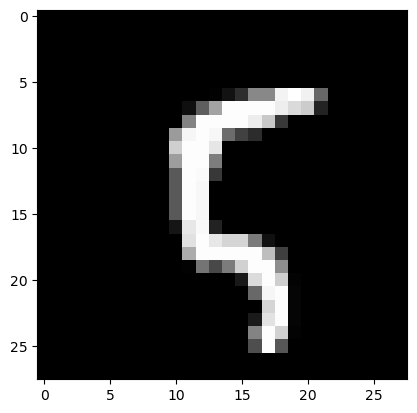

5


In [4]:
sample = Xtrain[100]
plt.imshow(sample, cmap='gray')
plt.show()
print(ytrain[100])

In [5]:
Xtrain[100]//255

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [6]:
#normalize the images -> values bet 0-1
Xtrain = Xtrain/255
Xtrest = Xtest/255

In [7]:
Xtrain[100]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
#reshape the images -> shape = (28,28,1)
Xtrain = np.expand_dims(Xtrain, -1)
Xtest = np.expand_dims(Xtest, -1)
print(Xtrain.shape)
print(Xtest.shape)
#0th index = no of samples

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# #convert class vectors to binary class metrices
# ytrain = keras.utils.to_categorical(ytrain, num_classes)
# ytest = keras.utils.to_categorical(ytest, num_classes)
model = keras.Sequential(
[
keras.Input(shape=input_shape),
layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)), #down sample
layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),
layers.Flatten(),
layers.Dropout(0.4),
#layers.Dense(15, activation='relu'),#add more dense layers
#layers.Dropout(0.4),#trying using dropout
layers.Dense(num_classes, activation='softmax')
]
)
#28-3+1
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [11]:
batch_size = 128
epochs = 15

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
#multiclass - loss= categorical, else binary or sparse categorical

In [15]:
#model training
hist = model.fit(Xtrain, ytrain, batch_size=batch_size, epochs = epochs,
validation_split=0.1)

Epoch 1/15


422/422 [==============================] - 7s 14ms/step - loss: 0.3331 - accuracy: 0.8997 - val_loss: 0.0784 - val_accuracy: 0.9790
Epoch 2/15
422/422 [==============================] - 5s 13ms/step - loss: 0.0994 - accuracy: 0.9697 - val_loss: 0.0590 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 5s 12ms/step - loss: 0.0763 - accuracy: 0.9772 - val_loss: 0.0482 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0622 - accuracy: 0.9807 - val_loss: 0.0420 - val_accuracy: 0.9883
Epoch 5/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0397 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0362 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0364 - val_accuracy: 0.98

In [16]:
print(hist.history)

{'loss': [0.3330973982810974, 0.0993628278374672, 0.07631495594978333, 0.062201231718063354, 0.05467158555984497, 0.048029690980911255, 0.04323572292923927, 0.04040754213929176, 0.03706066682934761, 0.0353446863591671, 0.03274070471525192, 0.030705707147717476, 0.02889964170753956, 0.028410840779542923, 0.024957802146673203], 'accuracy': [0.8996852040290833, 0.9697036743164062, 0.9772037267684937, 0.9807037115097046, 0.982703685760498, 0.9852222204208374, 0.9865000247955322, 0.9869815111160278, 0.9886666536331177, 0.9888148307800293, 0.9895740747451782, 0.9896851778030396, 0.9906111359596252, 0.990240752696991, 0.9915740489959717], 'val_loss': [0.0784105435013771, 0.059019897133111954, 0.04822320118546486, 0.04202424734830856, 0.03966739773750305, 0.03624734655022621, 0.03638271242380142, 0.03404159098863602, 0.03275017440319061, 0.029570063576102257, 0.030520569533109665, 0.030382325872778893, 0.028285032138228416, 0.031073102727532387, 0.02784082107245922], 'val_accuracy': [0.9789999

In [17]:
score = model.evaluate(Xtest, ytest, verbose=0)
print("test loss: ", score[0])
print("test accuracy: ", score[1])

test loss:  5.797645568847656
test accuracy:  0.9901000261306763


In [18]:
y_pred = model.predict(Xtest)

313/313 [==============================] - 1s 2ms/step


In [19]:
y_pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_pred_classes = np.argmax(y_pred, axis=1)

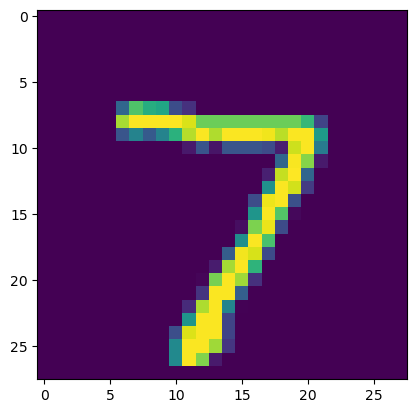

In [21]:
plt.imshow(Xtest[0])
plt.show()

In [22]:
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_classes)
cm

array([[ 975,    0,    0,    0,    2,    0,    0,    1,    2,    0],
       [   0, 1125,    3,    2,    1,    1,    1,    0,    2,    0],
       [   1,    1, 1020,    0,    2,    0,    1,    4,    3,    0],
       [   0,    0,    4, 1000,    0,    3,    0,    0,    3,    0],
       [   0,    0,    0,    0,  979,    0,    0,    0,    2,    1],
       [   1,    0,    0,    4,    0,  883,    1,    0,    3,    0],
       [   1,    2,    0,    0,    3,    1,  947,    0,    4,    0],
       [   0,    2,   11,    1,    0,    0,    0, 1011,    1,    2],
       [   1,    0,    1,    0,    1,    0,    0,    0,  969,    2],
       [   0,    0,    0,    0,    9,    2,    0,    1,    5,  992]],
      dtype=int64)

In [24]:
from sklearn.metrics import classification_report
cr = classification_report(ytest, y_pred_classes)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
model.save('mnist_t1.h5')

C:\Users\Sciddhanto\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


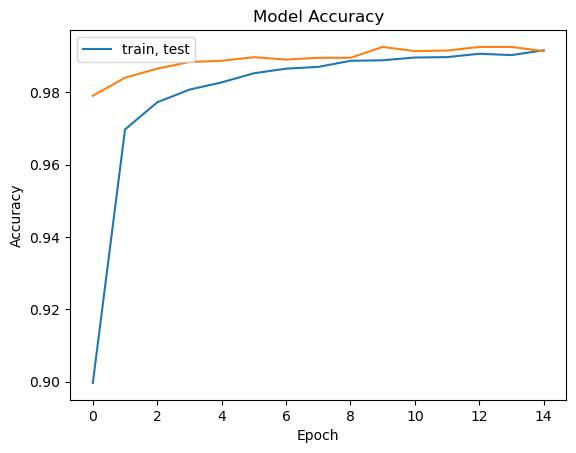

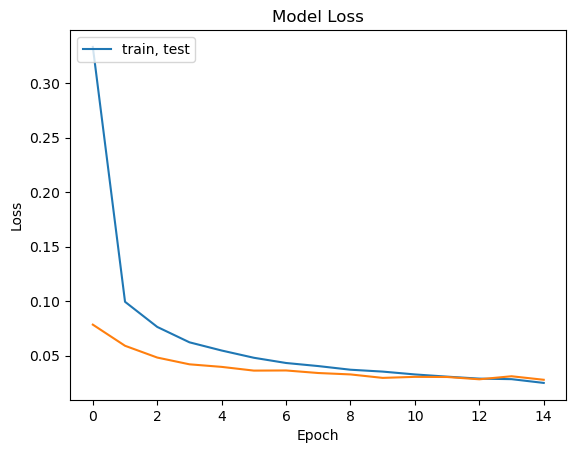

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train, test'], loc='upper left')
plt.show()
#training
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['train, test'], loc='upper left')

In [31]:
import tensorflow as tf
mn_model = tf.keras.models.load_model("D:/MIT/Semester-6/Machine Learning Lab/Everything/mnist_t1.h5")

In [39]:
import cv2 as cv

In [43]:
image = cv.imread("D:/MIT/Semester-6/Machine Learning Lab/Datasets/Content-1.jpg")

In [44]:
image.shape

(582, 612, 3)

In [45]:
gray_image=cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [46]:
gray_image.shape

(582, 612)

In [47]:
img = cv.resize(gray_image, (28,28))

In [48]:
img = np.expand_dims(img, -1)
img = np.expand_dims(img, 0)

In [49]:
img.shape

(1, 28, 28, 1)

In [50]:
pred = (mn_model.predict(img))

1/1 [==============================] - 0s 76ms/step


In [51]:
print(np.argmax(pred, axis=1))

[2]
